In [1]:
print('hello')

hello


In [2]:
import numpy as np
import pandas as pd
from scipy.sparse import coo_matrix
import implicit

# Load the MovieLens dataset
data = pd.read_csv('path_to_movielens_data/ratings.csv')

# Convert explicit ratings to implicit feedback
data['interaction'] = data['rating'].apply(lambda x: 1 if x > 3.5 else 0)

# Create a sparse matrix
user_movie_matrix = coo_matrix((data['interaction'], (data['userId'], data['movieId'])))

# Apply ALS using the implicit library
model = implicit.als.AlternatingLeastSquares(factors=50, regularization=0.01, iterations=20)
model.fit(user_movie_matrix.T)  # Note: We transpose the matrix because implicit expects item-user format

# Get recommendations for a user (e.g., user_id=1)
user_id = 1
recommended = model.recommend(user_id, user_movie_matrix)

# Print recommended movie IDs
print([item[0] for item in recommended])


<class 'ModuleNotFoundError'>: No module named 'implicit'

In [3]:
Non-negative Matrix Factorization (NMF)

<class 'SyntaxError'>: invalid syntax (<ipython-input-3-51c889b1515d>, line 1)

In [4]:
from sklearn.decomposition import NMF

# Create an NMF instance with desired number of components
model = NMF(n_components=5, init='random', random_state=0)

# Fit the model to your data (V)
W = model.fit_transform(V)
H = model.components_


<class 'NameError'>: name 'V' is not defined

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Sample documents
documents = [
    "apple banana fruit",
    "apple orange fruit",
    "car bike vehicle",
    "bike scooter vehicle",
    "apple computer technology",
    "laptop computer technology"
]

# Convert documents to term-document matrix
vectorizer = TfidfVectorizer(stop_words='english')
print(vectorizer)

X = vectorizer.fit_transform(documents)


# Apply NMF
nmf = NMF(n_components=3, init='random', random_state=0)
W = nmf.fit_transform(X)
H = nmf.components_

# Display topics
##   print(f"Topic {i + 1}: {', '.join([vectorizer.get_feature_names()[j] for j in topic.argsort()[-3:]])}")

# ... [rest of the code remains unchanged]

# Display topics
for i, topic in enumerate(H):
    print(f"Topic {i + 1}: {', '.join([vectorizer.get_feature_names_out()[j] for j in topic.argsort()[-3:]])}")


TfidfVectorizer(stop_words='english')
X
Topic 1: laptop, computer, technology
Topic 2: orange, apple, fruit
Topic 3: car, bike, vehicle


In [8]:
import numpy as np

# Coefficient Matrix A
A = np.array([[1, 1, 1],
              [0, 2, 5],
              [2, 5, -1]])

# Column Matrix B
B = np.array([6, -4, 27])

# Compute the inverse of A
A_inv = np.linalg.inv(A)

# Compute the solution X
X = np.dot(A_inv, B)

X

array([ 5.,  3., -2.])

In [9]:
import numpy as np

# Dummy data for exam_scores and hours_studied
exam_scores = np.array([50, 55, 90, 85, 60])
hours_studied = np.array([2, 3, 8, 7, 4])

# Combine the two arrays into a 2D matrix
X_train = np.column_stack((exam_scores, hours_studied))

# Create y_train based on exam_scores (1 if score > 65 else 0)
y_train = (exam_scores > 65).astype(int)

X_train, y_train

(array([[50,  2],
        [55,  3],
        [90,  8],
        [85,  7],
        [60,  4]]),
 array([0, 0, 1, 1, 0]))

In [10]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(0)

# Automatically generate random data for 10 students
exam_scores = np.random.randint(40, 101, 10)
hours_studied = np.random.randint(1, 10, 10)

# Combine the two arrays into a 2D matrix
X_train = np.column_stack((exam_scores, hours_studied))

# Create y_train based on exam_scores (1 if score > 65 else 0)
y_train = (exam_scores > 65).astype(int)

X_train, y_train

(array([[84,  6],
        [87,  3],
        [93,  5],
        [40,  8],
        [43,  7],
        [99,  9],
        [43,  9],
        [79,  2],
        [49,  7],
        [59,  8]]),
 array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0]))

In [11]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic data
np.random.seed(0)
# Features: hours studied and attendance rate
X = np.column_stack((np.random.randint(1, 10, 100), np.random.rand(100)))
# Target: pass (1) or fail (0) based on hours studied (pass if > 5 hours)
y = (X[:, 0] > 5).astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create and train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display coefficients and accuracy
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)
print("Accuracy:", accuracy)


Coefficients: [[ 2.54881441 -0.04986086]]
Intercept: [-14.20298165]
Accuracy: 1.0


In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)

In [16]:
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [17]:
y

range(0, 5)

In [19]:
list(y)

[0, 1, 2, 3, 4]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
X_train

array([[4, 5],
       [0, 1],
       [6, 7]])

In [22]:
X_test

array([[2, 3],
       [8, 9]])

In [23]:
y_train

[2, 0, 3]

In [24]:
y_test

[1, 4]

In [25]:
closing_prices = [50, 52, 53, 54, 53, 52, 50, 49, 48, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58]

def calculate_stochastic_oscillator(closing_prices, n=14, m=3):
    k_values = []
    d_values = []

    for i in range(n-1, len(closing_prices)):
        high = max(closing_prices[i-n+1:i+1])
        low = min(closing_prices[i-n+1:i+1])
        k = ((closing_prices[i] - low) / (high - low)) * 100
        k_values.append(k)

    for i in range(m-1, len(k_values)):
        d = sum(k_values[i-m+1:i+1]) / m
        d_values.append(d)

    return k_values, d_values

k_values, d_values = calculate_stochastic_oscillator(closing_prices)

for i in range(len(k_values)):
    print(f'Day {i+15}: %K = {k_values[i]:.2f}, %D = {d_values[i]:.2f}')

Day 15: %K = 57.14, %D = 76.19
Day 16: %K = 71.43, %D = 90.48
Day 17: %K = 100.00, %D = 100.00
Day 18: %K = 100.00, %D = 100.00
Day 19: %K = 100.00, %D = 100.00


<class 'IndexError'>: list index out of range

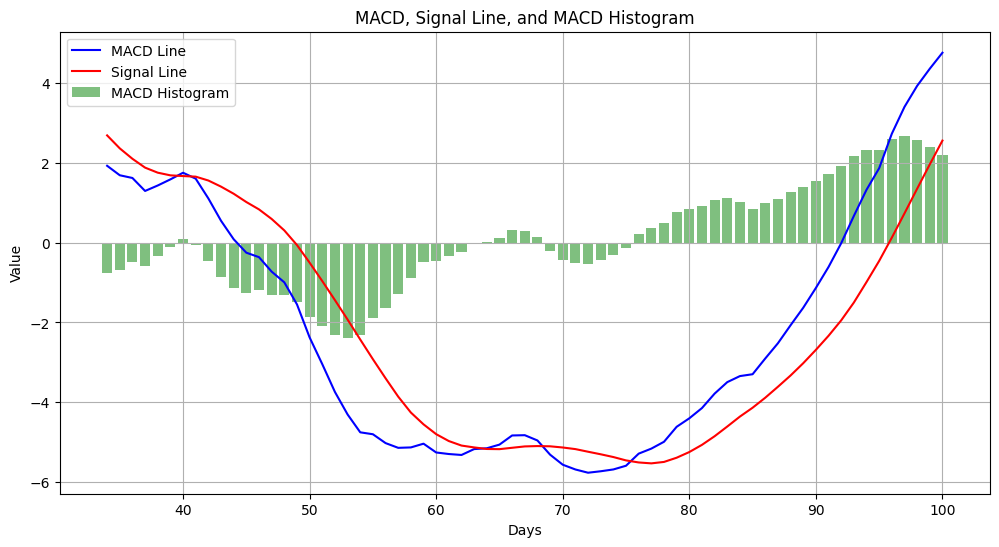

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Dummy data for illustration
np.random.seed(0)
days = np.linspace(1, 100, 100)
price = np.cumsum(np.random.randn(100) * 2) + 50

# Compute EMAs
ema_12 = np.convolve(price, np.ones(12)/12, mode='valid')
ema_26 = np.convolve(price, np.ones(26)/26, mode='valid')

# Compute MACD line and Signal line
macd_line = ema_12[14:] - ema_26
signal_line = np.convolve(macd_line, np.ones(9)/9, mode='valid')
macd_histogram = macd_line[8:] - signal_line

# Plotting
plt.figure(figsize=(12, 6))

# Plot MACD and Signal lines
plt.plot(days[33:], macd_line[8:], label='MACD Line', color='blue')
plt.plot(days[33:], signal_line, label='Signal Line', color='red')

# Plot MACD histogram
plt.bar(days[33:], macd_histogram, label='MACD Histogram', color='green', alpha=0.5)

plt.title('MACD, Signal Line, and MACD Histogram')
plt.xlabel('Days')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
